##### Library Import

In [1]:
import os
import pandas as pd
import numpy as np
import math
import missingno as msno

In [2]:
##setting working directory
os.chdir('C:/Users/Jeric/OneDrive/Desktop/Personal Projects/NYC_restaurants')

In [3]:
nyc = pd.read_csv("C:/Users/Jeric/OneDrive/Desktop/Personal Projects/NYC_restaurants/food_order.csv")

# Preliminary look at data

In [4]:
nyc.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [5]:
#data dimensions
row = len(nyc.axes[0])
column = len(nyc.axes[1])
print("Number of columns: ",column,",and number of rows: ",row)


Number of columns:  9 ,and number of rows:  1898


In [8]:
nyc.iloc[:, [2,3,5,6]] = nyc.iloc[:, [2,3,5,6]].astype('category')

In [9]:
nyc.dtypes

order_id                    int64
customer_id                 int64
restaurant_name          category
cuisine_type             category
cost_of_the_order         float64
day_of_the_week          category
rating                   category
food_preparation_time       int64
delivery_time               int64
dtype: object

Categorical variables: restaurant name, cuisine type, rating (ordinal)

Numerical: cost of order, food preparation, delivery time

In [10]:
rating_distribution = nyc.groupby("rating").size().sort_values(ascending=False)
print(rating_distribution)

rating
Not given    736
5            588
4            386
3            188
dtype: int64


There are 736 orders that do not have a rating which is approximately 38.78% of the data set, making it difficult to ignore and simply delete. 

### Why the empty ratings?
A quote from Himanshu Khanna, CEO of Sparklin, states that "Personality, mood, environment, urgency of the requirement, and eventual gratification all weigh in on how a user rates something". Usually it is strong feelings that spur customers to give feedback. A customer having a standard experience may not neccesarily find leaving a review worth the effort.

### Solution?
It is possible to assume that the missing data can be categorized as missing at random (MAR) which means that the reason that people do not give a rating may be related to other variables within the data. A possible solution would then be to either only observe the data with ratings or to impute the missing data. For this notebook, The missing data will be imputed and observed then compared to the unmodified data in terms of visualization.

In [11]:
#replace "Not Given" with NA
nyc_imp = nyc
nyc_imp = nyc_imp.replace('Not given', np.nan)

In [12]:
nyc_imp.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


<AxesSubplot:>

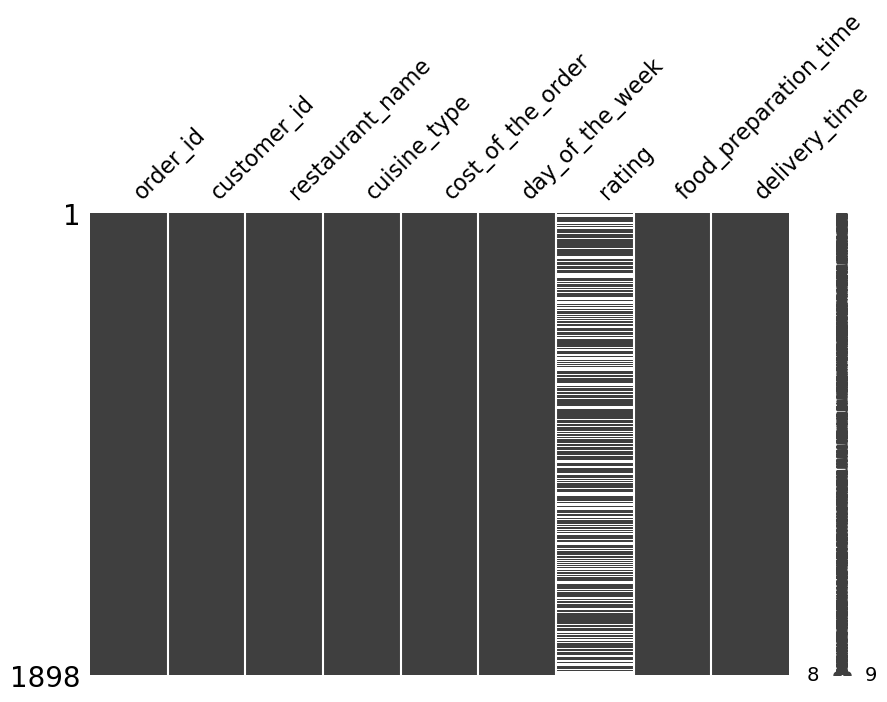

In [14]:
#visualizing missing data
msno.matrix(nyc_imp, figsize=(10, 6))

In [ ]:
#Dropping the ID columns and encoding the categorical variables
nyc_imp = nyc_imp.drop(nyc_imp.columns[:3], axis = 1)

In [15]:
#Use multivariate imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=123)
nyc_imp.iloc[:, [2,3,4,5,7,8]] = imputer.fit_transform(nyc_imp.iloc[:, [2,3,4,5,7,8]])

ValueError: could not convert string to float: 'Hangawi'

In [ ]:
#find summary statistics
print(nyc.loc[:,~nyc.columns.isin(['order_id','customer_id'])].describe().round(2))

Table of cuisine types

In [ ]:
#limit the display rows to 20 for readability
pd.options.display.max_rows = 20

In [ ]:
restaurant_orders = nyc.groupby(["cuisine_type","restaurant_name"]).size().sort_values(ascending=False)
print(restaurant_orders.head(10))

In [ ]:
avgprice_cuisine = nyc.groupby("cuisine_type")["cost_of_the_order"].mean().sort_values(ascending=False)
display(avgprice_cuisine)

In [ ]:
avgprep_cuisine = nyc.groupby("cuisine_type")["food_preparation_time"].mean().sort_values(ascending=False)
display(avgprep_cuisine)